## Diabetes Prediction Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Importing Dataset
dataset = pd.read_csv('diabetes.csv')

In [9]:
#Visualising top 10 records
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Basic info of columnsabs
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


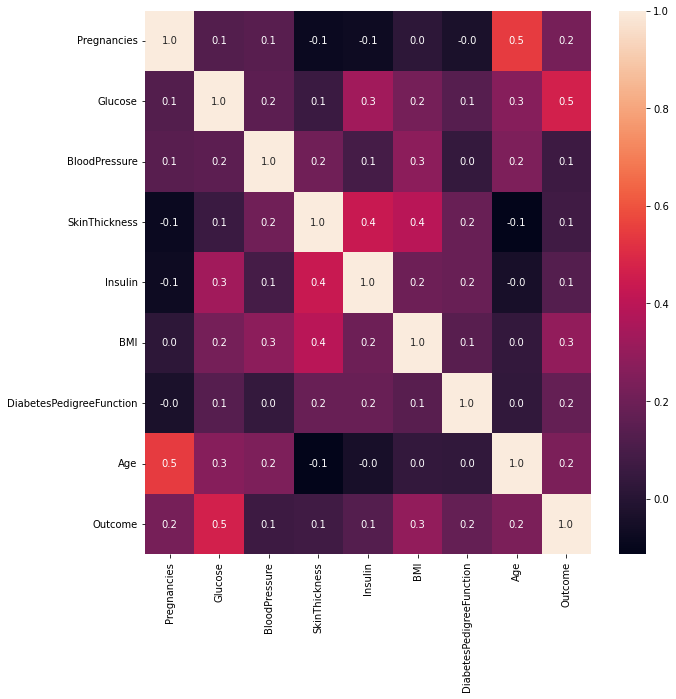

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f')
plt.show()

In [13]:
#age analysis
dataset.Age.value_counts()[:10]

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
Name: Age, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

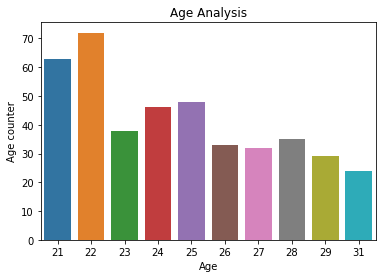

In [14]:
sns.barplot(x= dataset.Age.value_counts()[:10].index, y= dataset.Age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [15]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
countNoDisease = len(dataset[dataset.Outcome == 0])
countHaveDisease = len(dataset[dataset.Outcome == 1])
print("Percentage of patients dont have Diabetes: {:.2f}%".format((countNoDisease/(len(dataset.Outcome)))*100))
print("Percentage of patients have Diabetes: {:.2f}%".format((countHaveDisease/(len(dataset.Outcome)))*100))

Percentage of patients dont have Diabetes: 65.10%
Percentage of patients have Diabetes: 34.90%


In [17]:
young_ages = dataset[(dataset.Age>=29)&(dataset.Age<40)]
middle_ages =  dataset[(dataset.Age>=40)&(dataset.Age<55)]
elderly_ages =  dataset[(dataset.Age>=55)]

print("Young Ages", len(young_ages))
print("Middle Ages", len(middle_ages))
print("Elderly Ages", len(elderly_ages))

Young Ages 194
Middle Ages 153
Elderly Ages 54


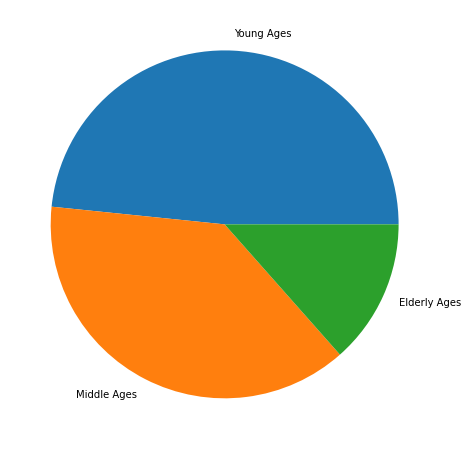

In [18]:
colors = ['blue','green','red']
explode= [1,1,1]
plt.figure(figsize=(8,8))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['Young Ages','Middle Ages','Elderly Ages'])
plt.show()

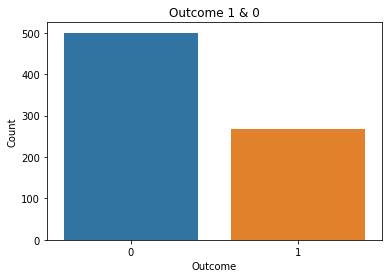

In [19]:
sns.countplot(dataset.Outcome)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome 1 & 0')
plt.show()

In [20]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Data Spliting 

In [21]:
Data = dataset.drop(['Outcome'],axis =1)
Outcome = dataset.Outcome.values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(Data,Outcome, test_size=0.2, random_state=1)

##  Model Building 

In [23]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
regressor = LogisticRegression()
regressor.fit(x_train,y_train)
print('Test Accuracy {:.2f}%'.format(regressor.score(x_test, y_test)*100))

Test Accuracy 77.92%


In [24]:
# KNN Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('KNN Accuracy {:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN Accuracy 74.03%


In [26]:
# Support Vactor 
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm1 = SVC(kernel='linear',gamma='scale',random_state=0)
svm2 = SVC(kernel='rbf',gamma='scale',random_state=0)
svm3 = SVC(kernel='poly',gamma='scale',random_state=0)
svm4 = SVC(kernel='sigmoid',gamma='scale',random_state=0)

svm.fit(x_train,y_train)
svm1.fit(x_train,y_train)
svm2.fit(x_train,y_train)
svm3.fit(x_train,y_train)
svm4.fit(x_train,y_train)

print('SVC Accuracy : {:,.2f}%'.format(svm.score(x_test,y_test)*100))

print('SVC Liner Accuracy : {:,.2f}%'.format(svm1.score(x_test,y_test)*100))

print('SVC RBF Accuracy : {:,.2f}%'.format(svm2.score(x_test,y_test)*100))

print('SVC Ploy Accuracy : {:,.2f}%'.format(svm3.score(x_test,y_test)*100))

print('SVC Sigmoid Accuracy : {:,.2f}%'.format(svm4.score(x_test,y_test)*100))







SVC Accuracy : 78.57%
SVC Liner Accuracy : 77.92%
SVC RBF Accuracy : 78.57%
SVC Ploy Accuracy : 77.92%
SVC Sigmoid Accuracy : 50.65%


In [27]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Bayes Accuracy : {:,.2f}%".format(nb.score(x_test,y_test)*100))

Naive Bayes Accuracy : 77.27%


In [29]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=100,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=1)

In [34]:

import pickle
dia_pred =  'di_model.h5'
saved_model = pickle.dump(rf,open(dia_pred,'wb'))


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0)
dt.fit(x_train,y_train)
print("Decision Tree Accuracy : {:,.2f}%".format(dt.score(x_test,y_test)*100))

In [ ]:
# XGboost
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(x_train,y_train)
print("XGboost accuracy : {:.2f}%".format(xg.score(x_test,y_test)*100))